Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Loading the dataset

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
X_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values

print(X_train.shape)
print(y_train.shape)
print(set(y_train))

(27455, 784)
(27455,)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}


Reshaping X_train

In [ ]:
X_train = X_train.reshape(27455, 28, 28)

Visualizing the images

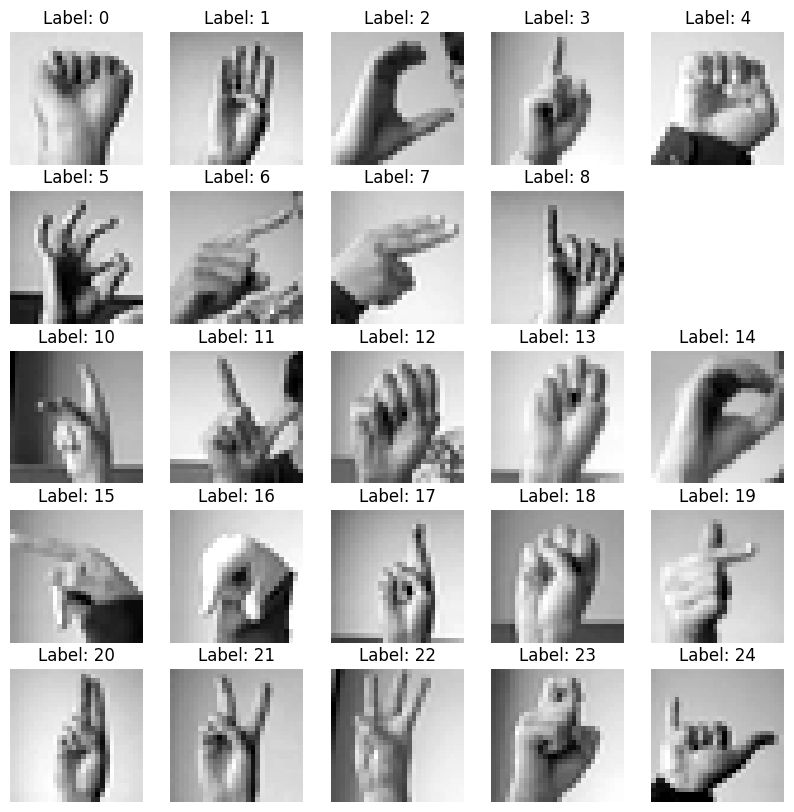

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
  if i!=9:
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[y_train == i][0], cmap='gray')
    plt.title(f'Label: {i}')
    plt.axis('off')

plt.show()

Checking Particular Image

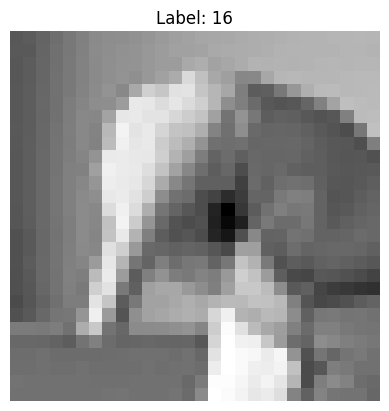

[[107 118 127 134 139 143 146 150 153 156 158 160 163 165 159 166 168 170
  170 171 171 171 172 171 171 170 170 169]
 [111 121 129 135 141 144 148 151 154 157 160 163 164 170 119 152 171 171
  170 171 172 172 172 172 172 171 171 170]
 [113 123 131 137 142 145 150 152 155 158 161 163 164 172 105 142 170 171
  171 171 172 172 173 173 172 171 171 171]
 [116 125 133 139 143 146 151 153 156 159 162 163 167 167  95 144 171 172
  172 172 172 172 173 173 173 172 172 171]
 [117 126 134 140 145 149 153 156 158 161 163 164 175 156  87 154 172 173
  173 173 173 173 174 174 174 173 172 172]
 [119 128 136 142 146 150 153 156 159 163 165 164 184 148  89 164 172 174
  174 174 174 175 175 174 175 174 173 173]
 [122 130 138 143 147 150 154 158 162 165 166 172 181 128  94 170 173 175
  174 175 176 177 177 177 177 175 175 174]
 [122 132 139 145 149 152 156 160 163 165 166 181 172 103 113 175 176 178
  178 179 179 179 179 178 179 177 175 174]
 [125 134 141 147 150 153 157 161 164 167 168 184 179 116 126 16

In [ ]:
idx = np.random.randint(27455, size=(1))[0]
plt.imshow(X_train[idx], cmap='gray')
plt.title(f'Label: {y_train[idx]}')
plt.axis('off')
plt.show()

print(X_train[0])

Changing X_train to a 3-D array

In [ ]:
X_train = X_train.reshape(27455, 28, 28, 1)
X_train = X_train/255

One-hot encoding y_train

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


Creating the model

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(256, (5,5), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(25, activation='softmax'))

Compiling the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fitting the model

In [ ]:
history = model.fit(X_train, y_train, epochs=1)

858/858 ━━━━━━━━━━━━━━━━━━━━ 56s 66ms/step - accuracy: 0.9988 - loss: 0.0054


Making final predictions with the model

In [ ]:
X_test = test.iloc[:, 1:].values
X_test = X_test.reshape(7172, 28, 28, 1)
X_test = X_test/255

In [ ]:
predictions = model.predict(X_test).argmax(axis=1)
print(predictions)

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step
[ 6  5 10 ...  2  4  2]


In [ ]:
final = pd.DataFrame({'id': test.iloc[:,0].values, 'label': predictions})
final.to_csv('final.csv', index=False)